In [ ]:
### 1. Import Required Libraries

#We begin by importing the necessary libraries for data handling, visualization, and modeling.

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## 2. Load the Dataset

#We load the dataset containing student performance data. The dataset includes scores in math, reading, and writing, along with demographic details.


In [2]:
df = pd.read_csv('C:\\Users\\sahel\\Desktop\\internship\\Student_Performance_Predictor\\data\\StudentsPerformance.csv')

In [ ]:
## 3. Preview the Dataset

#Display the first few rows of the dataset to understand its structure and contents.


In [3]:
print(df.head())
print(df.info())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

In [ ]:
## 4. Summary Statistics and Null Values

#This cell displays basic statistical information and checks for any missing values in the dataset.

In [4]:
print(df.describe())
print(df.isnull().sum())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
## 5. Distribution of Scores

#We plot histograms for math, reading, and writing scores to understand how the scores are distributed.


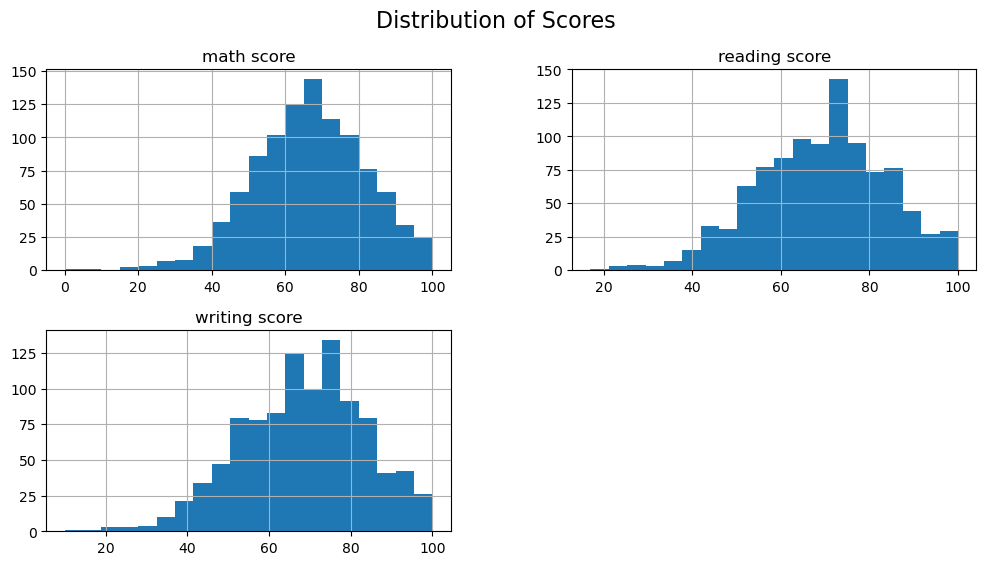

In [5]:
df[['math score', 'reading score', 'writing score']].hist(bins=20, figsize=(12, 6))
plt.suptitle("Distribution of Scores", fontsize=16)
plt.show()

In [ ]:
## 6. Gender-wise Comparison of Scores

#Boxplots show how math, reading, and writing scores differ between male and female students.

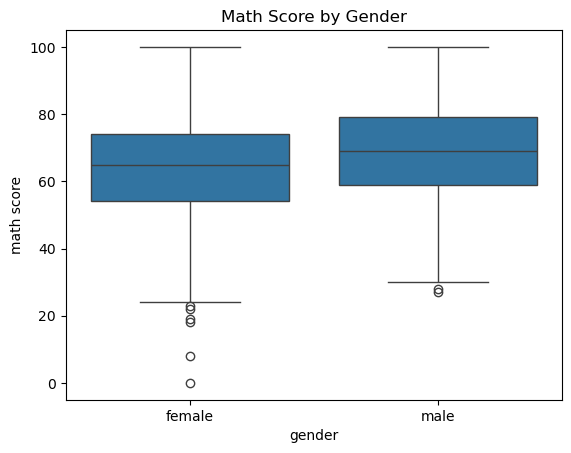

In [6]:
sns.boxplot(x='gender', y='math score', data=df)
plt.title("Math Score by Gender")
plt.show()


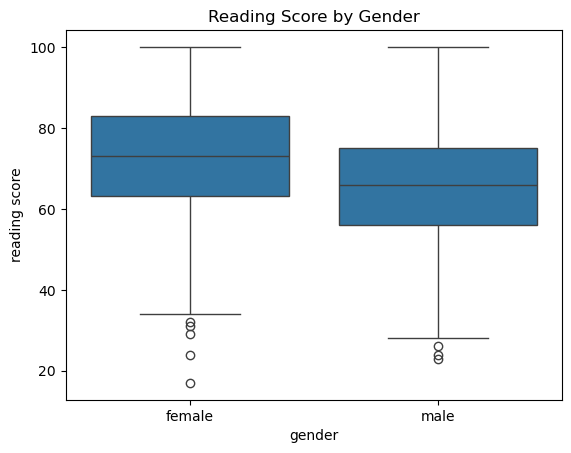

In [7]:
sns.boxplot(x='gender', y='reading score', data=df)
plt.title("Reading Score by Gender")
plt.show()

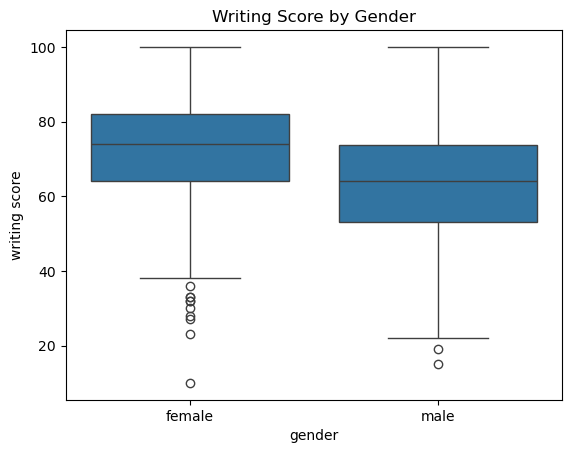

In [8]:
sns.boxplot(x='gender', y='writing score', data=df)
plt.title("Writing Score by Gender")
plt.show()

In [ ]:
## 7. Correlation Heatmap

#This heatmap shows the correlation between math, reading, and writing scores. It helps identify which scores are most closely related.


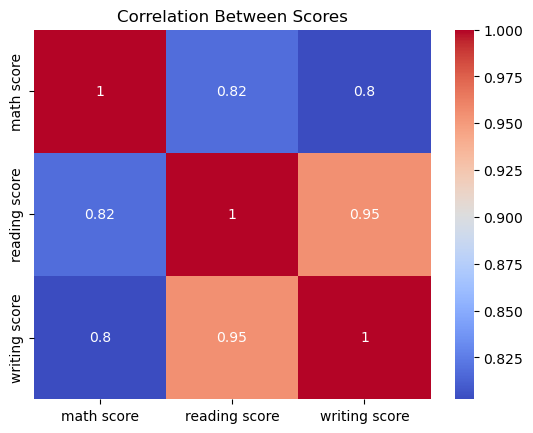

In [9]:
corr = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Scores")
plt.show()

In [ ]:
## 8. Encode Categorical Features

#Categorical variables are encoded into numerical format using LabelEncoder to prepare the data for machine learning models.


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
df_encoded = df.copy()

In [23]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

In [25]:
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [27]:
print(df_encoded.head())

   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  math score  reading score  writing score  
0                        1          72             72             74  
1                        0          69             90             88  
2                        1          90             95             93  
3                        1          47             57             44  
4                        1          76             78             75  


In [ ]:
## 9. Split Data into Features and Target

#We define the input features `X` and the target variable `y` (math score) for prediction.


In [29]:
X = df_encoded.drop(['math score'], axis=1) 
y = df_encoded['math score']       

In [ ]:
## 10. Split into Training and Testing Sets

#We split the dataset into training and testing sets using an 80-20 ratio to evaluate model performance.


In [31]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 7)
X_test shape: (200, 7)
y_train shape: (800,)
y_test shape: (200,)


In [ ]:
## 11. Train a Linear Regression Model

#We train a Linear Regression model to predict math scores and evaluate its performance.


In [39]:
from sklearn.linear_model import LinearRegression

In [41]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("✅ Model training complete!")

✅ Model training complete!


In [ ]:
## 12. Predictions and Evaluation (Linear Regression)

#We generate predictions and evaluate the model using MAE, MSE, and R² score.


In [43]:
y_pred = lr_model.predict(X_test)

In [45]:
print("📊 Predicted vs Actual (First 5):")
for pred, actual in zip(y_pred[:5], y_test[:5]):
    print(f"Predicted: {pred:.2f} | Actual: {actual}")

📊 Predicted vs Actual (First 5):
Predicted: 77.12 | Actual: 91
Predicted: 57.07 | Actual: 53
Predicted: 79.36 | Actual: 80
Predicted: 77.15 | Actual: 74
Predicted: 84.91 | Actual: 84


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [51]:
print(f"📈 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")
print(f"✅ R² Score: {r2:.2f}")

📈 MAE: 4.13
📉 MSE: 28.28
✅ R² Score: 0.88


In [53]:
import matplotlib.pyplot as plt

In [ ]:
## 13. Actual vs Predicted Plot

#This scatter plot shows how closely predicted values align with actual math scores.


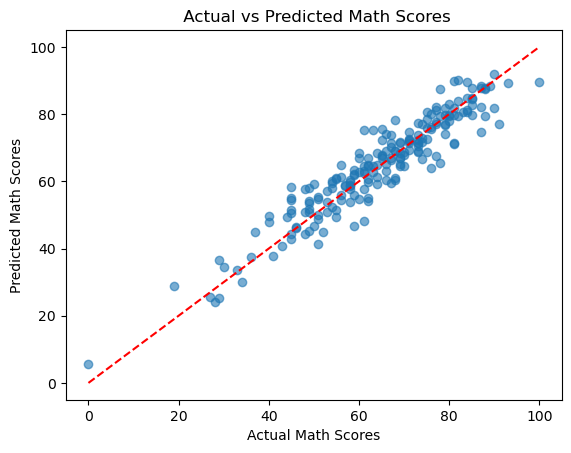

In [57]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title(" Actual vs Predicted Math Scores")
plt.plot([0, 100], [0, 100], '--', color='red')  # Line y = x
plt.show()

In [ ]:
## 14. Decision Tree Regressor

#We try a Decision Tree model to compare performance against Linear Regression.


In [59]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [63]:
tree_preds = tree_model.predict(X_test)

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_tree = mean_absolute_error(y_test, tree_preds)
mse_tree = mean_squared_error(y_test, tree_preds)
r2_tree = r2_score(y_test, tree_preds)

print("Decision Tree Results:")
print(f"MAE: {mae_tree:.2f}")
print(f"MSE: {mse_tree:.2f}")
print(f"R²:  {r2_tree:.2f}")

Decision Tree Results:
MAE: 6.00
MSE: 60.86
R²:  0.75


In [ ]:
## 15. Random Forest Regressor

#We also evaluate a Random Forest model to check for improved performance through ensemble learning.


In [69]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [73]:
rf_preds = rf_model.predict(X_test)

In [75]:
mae_rf = mean_absolute_error(y_test, rf_preds)
mse_rf = mean_squared_error(y_test, rf_preds)
r2_rf = r2_score(y_test, rf_preds)

print("Random Forest Results:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"R²:  {r2_rf:.2f}")

Random Forest Results:
MAE: 4.70
MSE: 36.79
R²:  0.85


In [ ]:
## 16. Final Model Comparison

#Compare the performance of all three models to determine the most effective one for this problem.


In [77]:
print("\n📊 Model Comparison Summary:")
print(f"Linear Regression  → MAE: {mae:.2f}, R²: {r2:.2f}")
print(f"Decision Tree      → MAE: {mae_tree:.2f}, R²: {r2_tree:.2f}")
print(f"Random Forest      → MAE: {mae_rf:.2f}, R²: {r2_rf:.2f}")


📊 Model Comparison Summary:
Linear Regression  → MAE: 4.13, R²: 0.88
Decision Tree      → MAE: 6.00, R²: 0.75
Random Forest      → MAE: 4.70, R²: 0.85


In [ ]:
## 🔚 Final Conclusion

The Linear Regression model achieved the highest performance in predicting math scores:
- MAE: 4.13
- R² Score: 0.88

This shows that student math scores can be fairly accurately predicted using demographic info and reading/writing performance.

Random Forest also gave good results (R² = 0.85) and can be explored further in future work.